# The block maxima method

This notebook continues with a subset of the dataset of the notebook about the `Dataset` object.
There are two main approaches in extreme value theory: the peaks over threshold approach and the block maxima approach.
In this notebook, the block maxima approach will be illustrated.

To make the plotting less crowded, we will take a subset of the original dataset by reducing `N_DATAPOINTS`.

In [1]:
from evt.dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 10000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

Let's start by examining the block maxima of the subset of our dataset.

In [2]:
from evt.methods.block_maxima import BlockMaxima

N_SAMPLES_PER_BLOCK = 500

block_maxima = BlockMaxima(dataset, N_SAMPLES_PER_BLOCK)

The block maxima are stored in the `self.block_maxima` attribute.

In [3]:
block_maxima.block_maxima

Index
494     14.705814
898     21.934068
1054    17.330014
1816    14.209838
2258    60.300196
2940    30.906538
3118    20.029986
3658    18.977237
4443    15.863892
4987    30.973975
5243    15.351123
5959    17.113452
6028    14.757835
6832    25.749505
7492    23.414757
7694    20.677813
8097    23.086739
8545    32.802845
9350    14.921351
9551    19.034830
Name: Values, dtype: float64

Visually inspect the block maxima using plotting functions of the block maxima object.

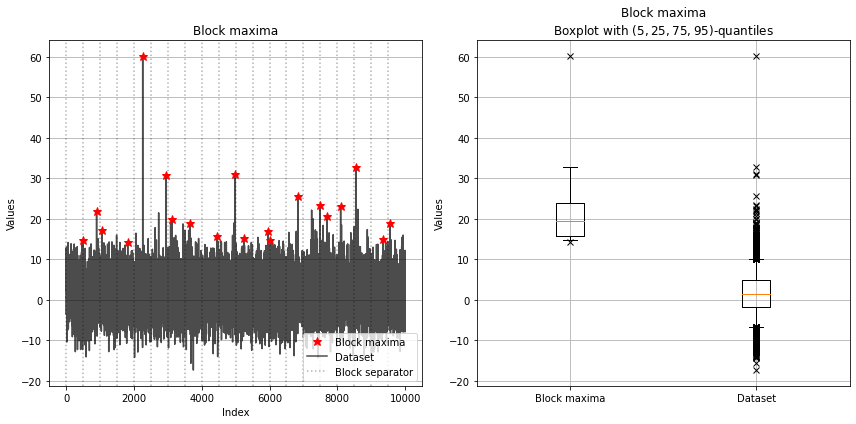

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

block_maxima.plot_block_maxima(ax1)
block_maxima.plot_block_maxima_boxplot(ax2)

fig.tight_layout()
plt.show()

On the left hand side, a plot of the block maxima against the original index is shown.
The blocks are indicated by dashed vertical lines.

On the right hand side, a boxplot of the block maxima is shown.
This is compared with the distribution of the original dataset.

The block maxima are the basis for estimation of the tail in the generalized extreme value distribution.
See the notebook about maximum likelihood for the generalized extreme value distribution for further details.